# Mitchell Pudil
## Econ 213R: Applied Machine Learning
## Homework 1: Exploring Data

## First Dataset: Homeschooling Data




### The First dataset is homeschooling data. We will be looking at how the demographics of children who are homeschooled compare with the demographics of those who are not homeschooled

### We will begin by importing the appropriate packages that will be used later to analyze data

In [2]:
import pandas as pd # Allows to type pd to represent pandas 
import numpy as np # Allows for scientific computing
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # Allows for cleaner graphing capabilities


### Import data and look at first few lines of the dataset.

In [3]:

homedf = pd.read_csv("/Users/mitchellpudil/Desktop/Personal_Research/Homeschool/homeschool2.csv")  # Import dataset from csv
homedf.head() # View first 5 rows of data



,Unnamed: 0,year,homeschool,lnhhinc,momed,maritalmom,momage,cage,numsib,cmale,...,zip,religious,hhinc,meducation,evermarried,educ_evermarried,marriedmom,mothered,marrieded,hvalue
0,1,2003,0,10.9151,3,1,37,8,2,1,...,3,1,55000,15,1,15,1,15,15,Not Homeschooled
1,2,2003,0,10.5321,2,1,36,16,2,0,...,1,1,37500,13,1,13,1,13,13,Not Homeschooled
2,3,2003,0,10.5321,2,1,36,10,2,0,...,1,1,37500,13,1,13,1,13,13,Not Homeschooled
3,4,2003,0,11.3794,5,1,39,8,2,1,...,2,0,87500,20,1,20,1,20,20,Not Homeschooled
4,5,2003,0,11.3794,5,1,39,6,2,1,...,2,0,87500,20,1,20,1,20,20,Not Homeschooled


### Let's now describe the data by looking at the mean, std, and quartiles for each of the columns/features

In [4]:
homedf.describe()  # Describes the data: mean, std, quartiles, etc.

,Unnamed: 0,year,homeschool,lnhhinc,momed,maritalmom,momage,cage,numsib,cmale,...,region,zip,religious,hhinc,meducation,evermarried,educ_evermarried,marriedmom,mothered,marrieded
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,...,1496.000000,1496.000000,1496.000000,1496.00000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,8032.062834,2005.118316,0.498663,10.681364,3.012032,1.583556,40.210561,11.430481,1.473262,0.522059,...,2.606283,1.601604,0.605615,61133.02139,14.655080,0.935160,13.780749,0.780080,14.850267,11.743316
std,10181.826004,3.316933,0.500165,0.962473,1.145526,1.260025,6.822385,3.917440,1.148776,0.499680,...,1.031640,0.804068,0.488882,44311.28131,3.542576,0.246325,4.964899,0.414331,3.085673,6.782203
min,1.000000,2003.000000,0.000000,7.824050,1.000000,1.000000,22.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,2500.00000,6.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,374.750000,2003.000000,0.000000,10.221900,2.000000,1.000000,36.000000,8.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,27500.00000,13.000000,1.000000,13.000000,1.000000,13.000000,8.000000
50%,748.500000,2003.000000,0.000000,10.915100,3.000000,1.000000,40.000000,11.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,55000.00000,15.000000,1.000000,15.000000,1.000000,15.000000,15.000000
75%,15256.750000,2007.000000,1.000000,11.379400,4.000000,1.000000,45.000000,15.000000,2.000000,1.000000,...,4.000000,2.000000,1.000000,87500.00000,17.000000,1.000000,17.000000,1.000000,17.000000,17.000000
max,34464.000000,2012.000000,1.000000,12.206100,5.000000,7.000000,74.000000,20.000000,6.000000,1.000000,...,4.000000,3.000000,1.000000,200000.00000,20.000000,1.000000,20.000000,1.000000,20.000000,20.000000


### Let's look at how the household income for the homeschooled and those who aren't compares by graphing in Seaborn

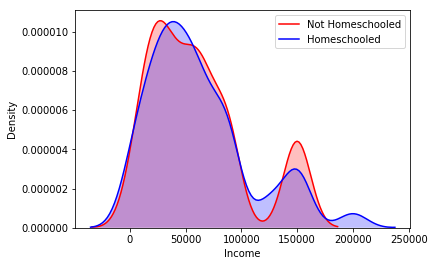

In [48]:
homedf['income'] = np.exp(homedf['lnhhinc'])   # Creates income variable based off of the natural log


income_data = pd.DataFrame(homedf, columns=['homeschool', 'income'])   # Subsets homedf dataframe to 
            # only homeschool and income

not_homeschooled = income_data.loc[(income_data['homeschool']==0)]
no_hs_income = pd.DataFrame(not_homeschooled, columns=['income'])
no_hs_income.columns = ['Not Homeschooled']
# Above 3 lines subsets the income data to only homeschoolers, takes only the income column, and 
# finally renames that column so that it fits for the graph legend

homeschooled = income_data.loc[(income_data['homeschool']==1)]
hs_income = pd.DataFrame(homeschooled, columns=['income'])
hs_income.columns = ['Homeschooled']

# plot of 2 variables
p1=sns.kdeplot(no_hs_income['Not Homeschooled'], shade=True, color="r")
p1=sns.kdeplot(hs_income['Homeschooled'], shade=True, color="b")
p1.set(xlabel='Income', ylabel='Density')



plt.show()


### Quartile Ranges of Child's Age

In [221]:
homedf.quantile([.25,0.5,.75])['cage']

0.25     8.0
0.50    11.0
0.75    15.0
Name: cage, dtype: float64

### We will now be determining the frequency of homeschoolers by gender

In [54]:
# Now using matplotlib to chart probability of being homeschooled by gender

import matplotlib.pyplot as plt   # imports matplotlib


homeschool1 = homedf['cmale'].value_counts(ascending=True) 
homeschool2 = homedf.pivot_table(values='homeschool', index=['cmale'])  # Creates frequency (pivot) table to look at the
                # number of people for each gender that has been homeschooled 
print("Frequency Table for Homeschooling:")
print(homeschool1)    # Prints frequency table for homeschooling

print("\nProbbility of being homeschooled by Gender")  
print(homeschool2)  # Prints frequency table for homeschooling by gender





Frequency Table for Homeschooling:
0    715
1    781
Name: cmale, dtype: int64

Probbility of being homeschooled by Gender
       homeschool
cmale            
0        0.534266
1        0.466069


### Let's graph our findings from  earlier

([<matplotlib.axis.XTick at 0x111a26278>,
 <a list of 2 Text xticklabel objects>)

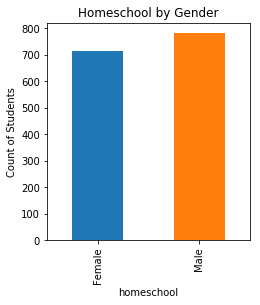

In [60]:

fig=plt.figure(figsize=(8,4))   # Define chart and set the size of the chart
ax1=fig.add_subplot(121)  # Allows for labeled axis, and adjusts the size of the bars
ax1.set_xlabel('homeschool') # Let x label be homeschool
ax1.set_ylabel('Count of Students') # Let y label be count of students
ax1.set_title('Homeschool by Gender') # Let axis title be homeschool by gender
temp1.plot(kind='bar')  # Define graph as a bar chart

# Rename cmale: 0 is female and 1 is male

plt.xticks([0, 1], ['Female','Male'])


### Let's look at how many homeschoolers/non-homeschoolers are religious (since it's BYU, afterall)- just for fun

([<matplotlib.axis.XTick at 0x11198f588>,
 <a list of 2 Text xticklabel objects>)

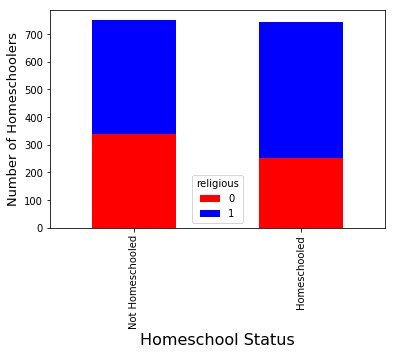

In [67]:

temp3 = pd.crosstab(homedf['homeschool'], homedf['religious'])  # Define the plot as the number of religious people 
        # and non-religious people that are and aren't homeschooled 
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)   # Create stacked bar chart

plt.ylabel('Number of Homeschoolers', fontsize=13)
plt.xlabel('Homeschool Status', fontsize=16)
plt.xticks([0, 1], ['Not Homeschooled','Homeschooled'])

### Personal subsetting exercise (just for fun/practice): Subsetting people who are male, whose family makes more than 100k, and are homeschooled

In [270]:
richmalehs = homedf.loc[(homedf['cmale']==1) & (homedf['hhinc'] > 100000) & (homedf['homeschool']==1)]   # Subset as defined above
richmalehs.head() # Looking at the first 5 entries

,Unnamed: 0,year,homeschool,lnhhinc,momed,maritalmom,momage,cage,numsib,cmale,...,hhinc,meducation,evermarried,educ_evermarried,marriedmom,mothered,marrieded,hvalue,income,homeincome
760,416,2003,1,11.9184,2,1,48,18,1,1,...,150000,13,1,13,1,13,13,Homeschooled,150001.414045,150001.414045
776,759,2003,1,11.9184,2,1,39,11,2,1,...,150000,13,1,13,1,13,13,Homeschooled,150001.414045,150001.414045
777,778,2003,1,11.9184,4,1,50,10,3,1,...,150000,17,1,17,1,17,17,Homeschooled,150001.414045,150001.414045
796,1576,2003,1,11.9184,4,1,41,11,3,1,...,150000,17,1,17,1,17,17,Homeschooled,150001.414045,150001.414045
803,1840,2003,1,11.9184,5,1,50,12,2,1,...,150000,20,1,20,1,20,20,Homeschooled,150001.414045,150001.414045


## Second Data Set: Crime Rates and Precipitation

### Our next data set will be crime rates and precipitation. Our goal here is to fix missing data (or at least a couple of the rows) and then determine if there is any correlation between precipitation and certain crime rates

In [61]:
crimedf = pd.read_csv("/Users/mitchellpudil/Desktop/Crime_Rate/crime.csv")  # Import data set
crimedf.head() # at first 10 lines of the data set


,month,murd,rape,rob,assl,burg,larc,veht,pop,year,city,Tmean,Prcp,Snow,Snwd
0,1,2.439098,3.949016,91.29195,212.4338,149.9465,287.8136,63.18425,860974.0,76,"Baltimore, MD",31.12903,0.132258,0.054839,0.032258
1,2,2.322951,2.322951,71.54688,223.0033,124.5101,288.1620,46.80745,860974.0,76,"Baltimore, MD",44.24138,0.074483,0.044828,0.034483
2,3,2.090656,4.645901,71.77917,233.9211,145.5329,315.2244,48.20122,860974.0,76,"Baltimore, MD",48.29032,0.071935,0.251613,0.290323
3,4,1.626065,3.832868,63.99729,238.9155,125.9039,290.1365,46.92360,860974.0,76,"Baltimore, MD",57.16667,0.042333,0.000000,0.000000
4,5,1.393770,4.645901,57.95761,262.1450,147.9720,326.0261,64.22958,860974.0,76,"Baltimore, MD",62.35484,0.162258,0.000000,0.000000


### Describe Data

In [62]:
crimedf.describe() # Note that crime rates are in crime per 100,000

,month,murd,rape,rob,assl,burg,larc,veht,pop,year,Tmean,Prcp,Snow,Snwd
count,4042.000000,3956.000000,3795.000000,3956.000000,3956.000000,3956.000000,3956.000000,3944.000000,4.028000e+03,4042.000000,4027.000000,4028.000000,4017.000000,4025.000000
mean,6.438149,1.862793,5.753337,55.746172,131.370748,166.721715,346.220161,103.820335,1.671597e+06,86.738743,60.679279,0.087357,0.030596,0.128988
std,3.452260,1.103834,2.579570,32.660631,84.258944,63.824224,105.802099,54.181254,1.698434e+06,6.490206,15.394288,0.084348,0.109333,0.715811
min,1.000000,0.000000,0.491336,6.424526,16.170800,34.977970,81.314780,11.801300,3.739730e+05,76.000000,10.451610,0.000000,0.000000,0.000000
25%,3.000000,1.062223,3.814394,28.029532,74.036127,122.150550,278.477000,61.790042,7.451270e+05,81.000000,52.129030,0.025161,0.000000,0.000000
50%,6.000000,1.702295,5.205219,48.450275,107.656000,158.949800,334.042450,95.786640,9.999000e+05,87.000000,61.964290,0.070000,0.000000,0.000000
75%,9.000000,2.429504,7.218239,79.370783,159.869475,207.468175,397.954400,134.350650,1.695239e+06,92.000000,71.245695,0.126774,0.000000,0.000000
max,12.000000,7.237594,18.385680,179.862000,544.122500,425.512800,780.833100,356.107300,7.530493e+06,98.000000,97.677420,1.830000,1.182143,17.838710


### Let's look at the correlations of different crime rates and precipitation

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


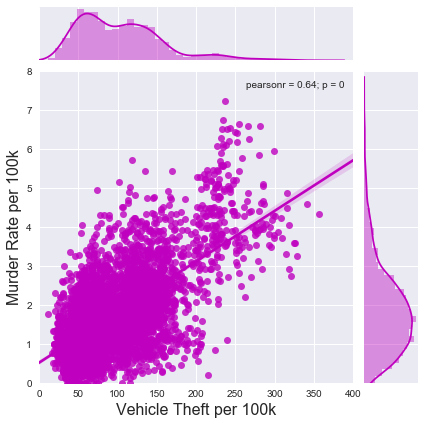

In [300]:
sns.set(style="darkgrid")

figure = (sns.jointplot("veht", "murd", data=crimedf, kind="reg",
                  xlim=(0, 400), ylim=(0, 8), color="m").set_axis_labels("Vehicle Theft per 100k", "Murder Rate per 100k", fontsize=16))

sns.despine()



In [238]:
crimedf.corr()

,month,murd,rape,rob,assl,burg,larc,veht,pop,year,Tmean,Prcp,Snow,Snwd
month,1.000000,0.085144,0.069587,0.075421,0.035151,0.074690,0.080782,0.056324,-0.001620,-0.031613,0.218534,-0.042036,-0.201959,-0.184727
murd,0.085144,1.000000,0.510430,0.663215,0.271522,0.416488,0.165411,0.637625,0.085204,0.054104,-0.094339,0.154368,0.126864,0.080371
rape,0.069587,0.510430,1.000000,0.330163,0.265272,0.554782,0.336400,0.356277,-0.268532,-0.036534,0.115492,0.135979,-0.010600,-0.025125
rob,0.075421,0.663215,0.330163,1.000000,0.344461,0.253620,0.075326,0.586601,0.385985,0.106852,-0.285665,0.120505,0.177447,0.086225
assl,0.035151,0.271522,0.265272,0.344461,1.000000,-0.054552,0.273201,0.234213,-0.133944,0.477755,0.098201,0.067068,-0.054543,-0.061037
burg,0.074690,0.416488,0.554782,0.253620,-0.054552,1.000000,0.615597,0.327131,-0.154091,-0.406034,0.139666,0.037554,-0.022915,-0.034833
larc,0.080782,0.165411,0.336400,0.075326,0.273201,0.615597,1.000000,0.179805,-0.287498,0.026075,0.298832,-0.032286,-0.196741,-0.148765
veht,0.056324,0.637625,0.356277,0.586601,0.234213,0.327131,0.179805,1.000000,0.146577,0.325005,-0.080304,0.023789,0.074196,0.041046
pop,-0.001620,0.085204,-0.268532,0.385985,-0.133944,-0.154091,-0.287498,0.146577,1.000000,0.024120,-0.141098,0.063618,0.098629,0.057290
year,-0.031613,0.054104,-0.036534,0.106852,0.477755,-0.406034,0.026075,0.325005,0.024120,1.000000,0.011753,0.038521,-0.052873,-0.054547


### Let's look at how many rows are missing per column

In [225]:
crimedf.apply(lambda x: sum(x.isnull()), axis=0)  # lambda function to determine number of missing observations per feature

month      0
murd      86
rape     247
rob       86
assl      86
burg      86
larc      86
veht      98
pop       14
year       0
city       0
Tmean     15
Prcp      14
Snow      25
Snwd      17
dtype: int64

### Let's look at how the different types of crime compare with each other to see which crime rate is most prevelant on average. 

In [297]:
murders = crimedf.loc[:,'rape':'veht']
murders.head()


,rape,rob,assl,burg,larc,veht
0,3.949016,91.29195,212.4338,149.9465,287.8136,63.18425
1,2.322951,71.54688,223.0033,124.5101,288.1620,46.80745
2,4.645901,71.77917,233.9211,145.5329,315.2244,48.20122
3,3.832868,63.99729,238.9155,125.9039,290.1365,46.92360
4,4.645901,57.95761,262.1450,147.9720,326.0261,64.22958


### Let's drop the missing observations for population, Tmean, Prcp, and Snow because there are not many missing observations and replace larceny with the mean. 


In [227]:
crimedf['larc'].fillna(crimedf['larc'].mean(), inplace=True)  # 
crimedf2 = crimedf[np.isfinite(crimedf['pop'])]   # Ask how to combine these commands into one
crimedf3 = crimedf2[np.isfinite(crimedf['Tmean'])]
crimedf4 = crimedf3[np.isfinite(crimedf['Snow'])]

# Let's run that lambda function again to make sure that there are no missing values for the robbery rate
crimedf4.apply(lambda x: sum(x.isnull()), axis=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


month      0
murd      72
rape     226
rob       72
assl      72
burg      72
larc       0
veht      84
pop        0
year       0
city       0
Tmean      0
Prcp       0
Snow       0
Snwd       1
dtype: int64

### It appears that there is a negative correlation between larceny rate and snowfall. Let's now do a regression to see if this is the case

In [249]:
import statsmodels.formula.api as sm   # Statsmodels is a library that will allow us to perform regressions
result = sm.ols(formula="larc ~ Tmean + rape + burg", data=crimedf4).fit()  # Define reg. formula and fit
print(result.params)

Intercept    80.692743
Tmean         1.672750
rape         -1.122872
burg          1.007691
dtype: float64


## Third Data Set: Loan Payments

### The last data set we will use will come from a .txt file that looks at loan payments. The goal here will be to estimate the effect of Price Change on Loan Payments Overdue and the difference in overdue loan payments between men and women, on average.

In [236]:
paymentsdf = pd.read_table('/Users/mitchellpudil/Desktop/indicators.txt', delim_whitespace=True)  # Import table
print(paymentsdf.head())  # Top 5 results
paymentsdf.describe()  # Mean, max, min, and other summary statistics

  MetroArea  PriceChange  LoanPaymentsOverdue  Male
0   Atlanta          1.2                 4.55   0.0
1    Boston         -3.4                 3.31   0.0
2   Chicago         -0.9                 2.99   1.0
3    Dallas          0.8                 4.26   1.0
4    Denver         -0.7                 3.56   0.0


,PriceChange,LoanPaymentsOverdue,Male
count,18.000000,18.000000,17.000000
mean,-3.427778,3.532222,0.529412
std,4.518043,1.061633,0.514496
min,-9.700000,1.650000,0.000000
25%,-7.000000,3.020000,0.000000
50%,-3.950000,3.300000,1.000000
75%,-0.750000,4.477500,1.000000
max,6.900000,5.630000,1.000000


### Let's take a look at price changes. This should help us determine the quality of the data.

Text(0,0.5,'Frequency')

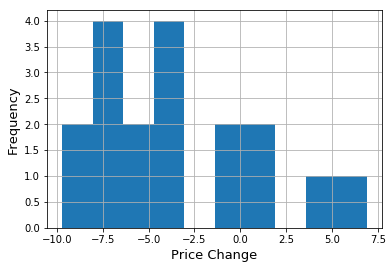

In [209]:
indicators['PriceChange'].hist()   # Quick plot of the price change
plt.xlabel('Price Change', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

### Let's look at the distribution of the average number of Loan Payments Overdue by Gender

Text(0,0.5,'Loan Payments Overdue')

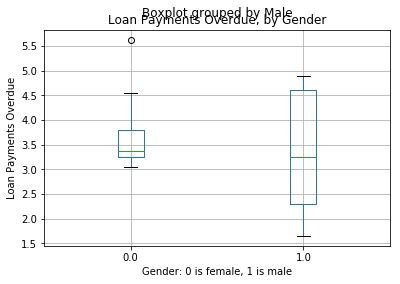

In [212]:
indicators.boxplot(column='LoanPaymentsOverdue', by='Male')
plt.title('Loan Payments Overdue, by Gender')
plt.xlabel('Gender: 0 is female, 1 is male')
plt.ylabel('Loan Payments Overdue')


### Let's do a simple linear regression to estimate the effect of Price Change on Loan Payments Overdue (note that there aren't too many observations, so the results will probably be biased.

In [165]:
import statsmodels.formula.api as sm   # Statsmodels is a library that will allow us to perform regressions
result = sm.ols(formula="LoanPaymentsOverdue ~ PriceChange + Male", data=indicators).fit()  # Define reg. formula and fit
price_change_coef = round(result.params[1], 2)  # Determine coefficient for price change and round
male_coef = round(result.params[2], 2) # Determine coefficient for males

print("We expect that for a 100% increase in price change, that the number of overdue loan payments changes by {}.".format(price_change_coef))
print("We also find that the average difference in overdue loan payments between a male and a female (male-female) is {}.".format(male_coef))



We expect that for a 100% increase in price change, that the number of overdue loan payments changes by -0.12.
We also find that the average difference in overdue loan payments between a male and a female (male-female) is -0.19.
